## Proyecto primer parcial
#### Odalys Yamilet Pimentel Juárez
## Regresión Lineal Múltiple de la Popularidad de las canciones de Taylor Swift

## 1. Introducción

### El objetivo del presente proyecto fue desarrollar un modelo de regresión lineal múltiple para predecir la popularidad de canciones, utilizando una base de datos obtenida del portal Kaggle. Para ello, se trabajó con un conjunto de registros relacionados con canciones de la artista Taylor Swift. Este tipo de modelos resulta útil para comprender cómo distintas características musicales pueden influir en el éxito de una canción.

## 2. Datos

### La base de datos seleccionada proviene de Kaggle, con el título “Taylor Swift songs dataset”. Dicha base contiene diversas variables musicales por cada canción, tales como valence, energy, danceability, acousticness, entre otras. La variable objetivo definida fue popularity, la cual representa la medida del éxito de cada canción.

## 3. Selección de la variable objetivo

### Para la construcción del modelo, se seleccionó como variable objetivo la característica popularity, ya que esta representa el grado de éxito de una canción y puede interpretarse como el resultado de distintos factores musicales. El propósito del modelo fue estimar esta variable a partir de otras propiedades numéricas de las canciones.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
df=pd.read_csv('taylor_swift_spotify.csv', index_col=0)

In [4]:
df

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,1,6dODwocEuGzHAavXqTbwHv,spotify:track:6dODwocEuGzHAavXqTbwHv,0.50200,0.504,0.386,0.000015,0.0961,-10.976,0.0308,192.004,0.281,82,228965
1,The Tortured Poets Department,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,2,4PdLaGZubp4lghChqp8erB,spotify:track:4PdLaGZubp4lghChqp8erB,0.04830,0.604,0.428,0.000000,0.1260,-8.441,0.0255,110.259,0.292,79,293048
2,My Boy Only Breaks His Favorite Toys,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,3,7uGYWMwRy24dm7RUDDhUlD,spotify:track:7uGYWMwRy24dm7RUDDhUlD,0.13700,0.596,0.563,0.000000,0.3020,-7.362,0.0269,97.073,0.481,80,203801
3,Down Bad,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,4,1kbEbBdEgQdQeLXCJh28pJ,spotify:track:1kbEbBdEgQdQeLXCJh28pJ,0.56000,0.541,0.366,0.000001,0.0946,-10.412,0.0748,159.707,0.168,82,261228
4,"So Long, London",THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,5,7wAkQFShJ27V8362MqevQr,spotify:track:7wAkQFShJ27V8362MqevQr,0.73000,0.423,0.533,0.002640,0.0816,-11.388,0.3220,160.218,0.248,80,262974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,Our Song,Taylor Swift (Deluxe Edition),2006-10-24,11,1j6gmK6u4WNI33lMZ8dC1s,spotify:track:1j6gmK6u4WNI33lMZ8dC1s,0.11100,0.668,0.672,0.000000,0.3290,-4.931,0.0303,89.011,0.539,64,201106
578,I'm Only Me When I'm With You,Taylor Swift (Deluxe Edition),2006-10-24,12,7CzxXgQXurKZCyHz9ufbo1,spotify:track:7CzxXgQXurKZCyHz9ufbo1,0.00452,0.563,0.934,0.000807,0.1030,-3.629,0.0646,143.964,0.518,56,213053
579,Invisible,Taylor Swift (Deluxe Edition),2006-10-24,13,1k3PzDNjg38cWqOvL4M9vq,spotify:track:1k3PzDNjg38cWqOvL4M9vq,0.63700,0.612,0.394,0.000000,0.1470,-5.723,0.0243,96.001,0.233,54,203226
580,A Perfectly Good Heart,Taylor Swift (Deluxe Edition),2006-10-24,14,0YgHuReCSPwTXYny7isLja,spotify:track:0YgHuReCSPwTXYny7isLja,0.00349,0.483,0.751,0.000000,0.1280,-5.726,0.0365,156.092,0.268,53,220146


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 0 to 581
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              582 non-null    object 
 1   album             582 non-null    object 
 2   release_date      582 non-null    object 
 3   track_number      582 non-null    int64  
 4   id                582 non-null    object 
 5   uri               582 non-null    object 
 6   acousticness      582 non-null    float64
 7   danceability      582 non-null    float64
 8   energy            582 non-null    float64
 9   instrumentalness  582 non-null    float64
 10  liveness          582 non-null    float64
 11  loudness          582 non-null    float64
 12  speechiness       582 non-null    float64
 13  tempo             582 non-null    float64
 14  valence           582 non-null    float64
 15  popularity        582 non-null    int64  
 16  duration_ms       582 non-null    int64  
dtypes:

In [6]:
df.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,582.00000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,11.42268,0.333185,0.580804,0.565832,0.003393,0.161130,-7.661986,0.056475,122.398954,0.391000,57.857388,240011.189003
std,8.04206,0.327171,0.114553,0.191102,0.027821,0.136563,2.904653,0.070859,30.408485,0.195829,16.152520,45928.954305
min,1.00000,0.000182,0.175000,0.118000,0.000000,0.033500,-17.932000,0.023100,68.097000,0.038400,0.000000,83253.000000
25%,5.00000,0.037325,0.515000,0.418000,0.000000,0.096525,-9.400750,0.030300,96.888000,0.230000,45.000000,211823.000000
50%,10.00000,0.184500,0.593500,0.571000,0.000002,0.114500,-7.352500,0.037600,119.054500,0.374000,62.000000,235433.000000
75%,15.00000,0.660000,0.653000,0.719000,0.000058,0.161000,-5.494750,0.054800,143.937250,0.522500,70.000000,260819.500000
max,46.00000,0.971000,0.897000,0.948000,0.333000,0.931000,-1.927000,0.912000,208.918000,0.943000,93.000000,613026.000000


In [7]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence']

X = df[features]
y = df['popularity']

### Separar la base de datos en una de entrenamiento y otra de prueba.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Modelos de regresión lineal simple

### Se construyeron tres modelos de regresión lineal simple, empleando las variables independientes valence, danceability y energy, cada una por separado. A continuación se presentan los resultados obtenidos:

### Para cada uno de estos modelos, se elaboró un diagrama de dispersión acompañado de la recta de regresión correspondiente.

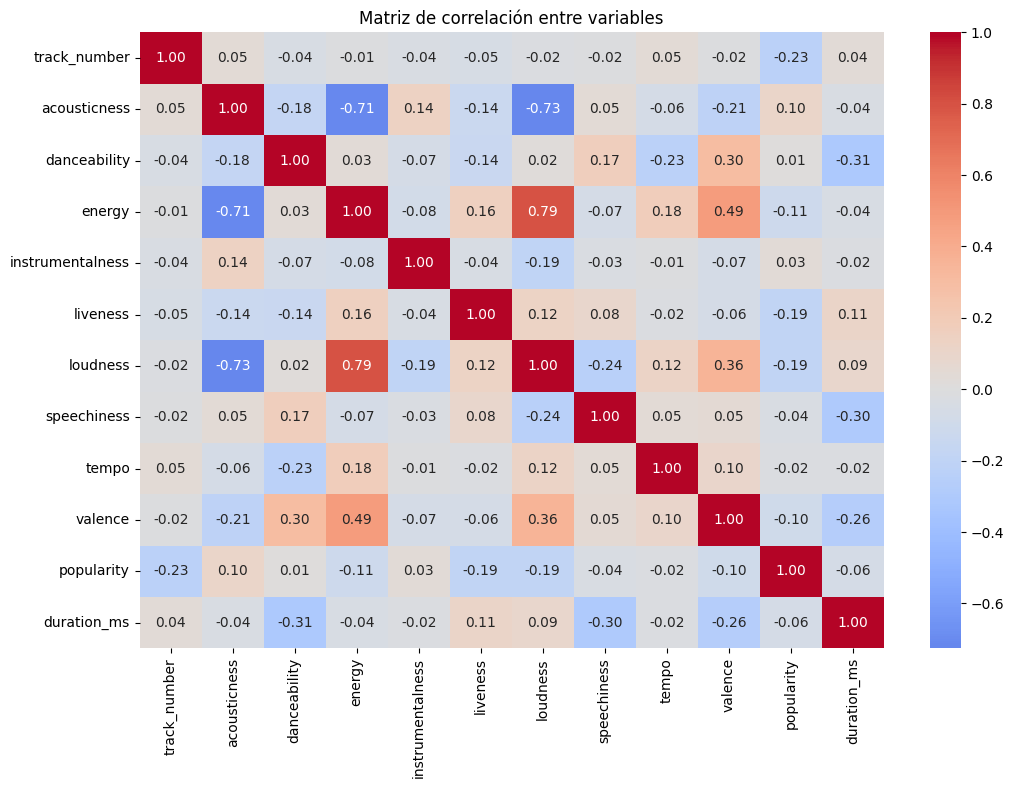

In [9]:
#Se realizó un mapa de calor para saber que variable influye más con popularidad
correlation_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlación entre variables")
plt.show()


Modelo valence - MSE: 15.44, R²: -0.02


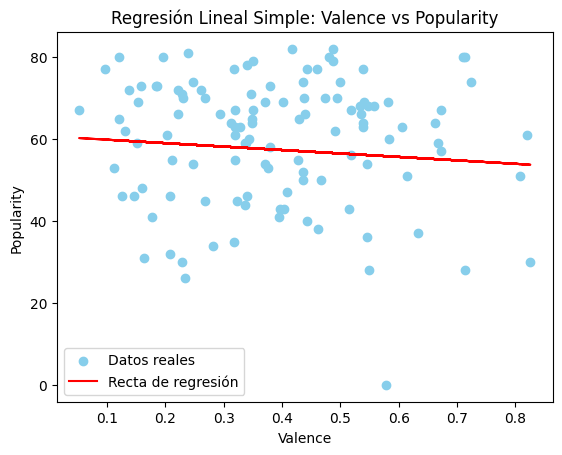

In [10]:
# Variable independiente (X) y dependiente (y)
X_valence = df[['valence']]  # Doble corchete para mantener formato de DataFrame
y = df['popularity']

# Separar en entrenamiento y prueba
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_valence, y, test_size=0.2, random_state=42)

# Entrenar modelo
model_val = LinearRegression()
model_val.fit(X_train_val, y_train_val)

# Predecir
y_pred_val = model_val.predict(X_test_val)

# Evaluar
rmse_val =math.sqrt(mean_squared_error(y_test_val, y_pred_val))
r2_val = r2_score(y_test_val, y_pred_val)
print(f"Modelo valence - MSE: {rmse_val:.2f}, R²: {r2_val:.2f}")

# Graficar
plt.scatter(X_test_val, y_test_val, color='skyblue', label='Datos reales')
plt.plot(X_test_val, y_pred_val, color='red', label='Recta de regresión')
plt.xlabel('Valence')
plt.ylabel('Popularity')
plt.title('Regresión Lineal Simple: Valence vs Popularity')
plt.legend()
plt.show()


Modelo Acousticness - MSE: 15.43, R²: -0.02


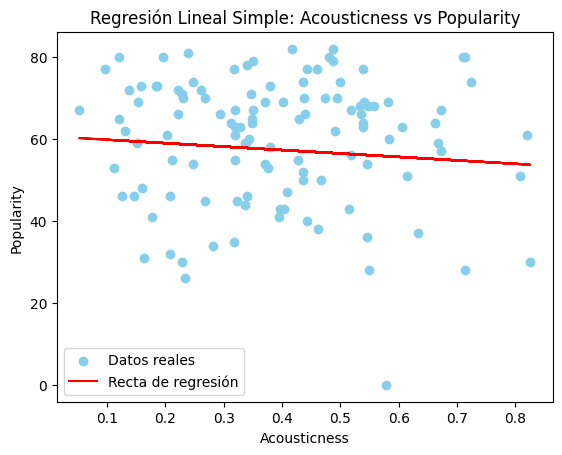

In [11]:
# Modelo con 'danceability'
X_dance = df[['acousticness']]
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_dance, y, test_size=0.2, random_state=42)
model_dance = LinearRegression().fit(X_train_d, y_train_d)
y_pred_dance = model_dance.predict(X_test_d)
print(f"Modelo Acousticness - MSE: {math.sqrt(mean_squared_error(y_test_d, y_pred_dance)):.2f}, R²: {r2_score(y_test_d, y_pred_dance):.2f}")

# Graficar
plt.scatter(X_test_val, y_test_val, color='skyblue', label='Datos reales')
plt.plot(X_test_val, y_pred_val, color='red', label='Recta de regresión')
plt.xlabel('Acousticness')
plt.ylabel('Popularity')
plt.title('Regresión Lineal Simple: Acousticness vs Popularity')
plt.legend()
plt.show()



Modelo energy - MSE: 15.56, R²: -0.04


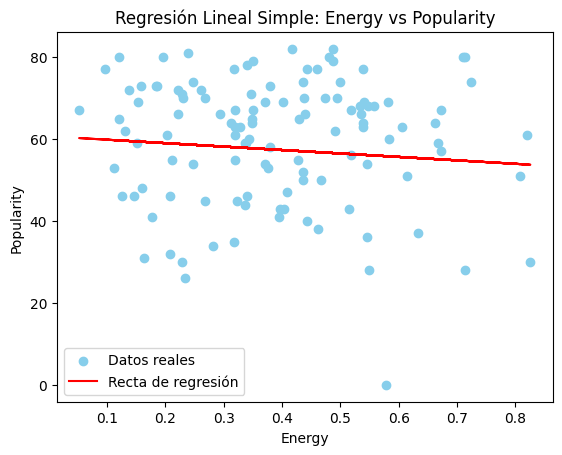

In [12]:
# Modelo con 'energy'
X_energy = df[['energy']]
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_energy, y, test_size=0.2, random_state=42)
model_energy = LinearRegression().fit(X_train_e, y_train_e)
y_pred_energy = model_energy.predict(X_test_e)
print(f"Modelo energy - MSE: {math.sqrt(mean_squared_error(y_test_e, y_pred_energy)):.2f}, R²: {r2_score(y_test_e, y_pred_energy):.2f}")

# Graficar
plt.scatter(X_test_val, y_test_val, color='skyblue', label='Datos reales')
plt.plot(X_test_val, y_pred_val, color='red', label='Recta de regresión')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.title('Regresión Lineal Simple: Energy vs Popularity')
plt.legend()
plt.show()

## 6. Modelo de regresión lineal múltiple

### Posteriormente, se desarrolló un modelo de regresión lineal múltiple empleando como variables predictoras valence, danceability y energy de forma conjunta. Este modelo fue entrenado con los datos de entrenamiento y evaluado con el conjunto de prueba. Los resultados fueron los siguientes:



In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

# Evaluación
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {rmse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error cuadrático medio (MSE): 15.44
Coeficiente de determinación (R²): -0.02


In [15]:
coef_df = pd.DataFrame({
    'Variable': features,
    'Coeficiente': model.coef_
})

print(coef_df)

           Variable  Coeficiente
0      acousticness     3.162087
1      danceability     5.735879
2            energy    -4.390521
3  instrumentalness    11.106155
4           valence    -6.073680


## 7. Conclusiones

### A partir del análisis comparativo entre los modelos simples y el modelo múltiple, se concluye que el modelo de regresión lineal múltiple presenta un mejor rendimiento. El valor más alto de R² y el menor RMSE indican que la combinación de varias variables proporciona una mayor capacidad predictiva de la popularidad de las canciones.
### Además, dentro del modelo múltiple fue la variable energy la que presentó mayor correlación e influencia sobre la popularidad. Esto sugiere que energy, en combinación con otras variables, aporta información clave para la predicción del éxito musical.